# 1 Homogeneity


## 1.1 Perfectly homogeneous:

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

# Evaluate the score
hscore = homogeneity_score([0, 1, 0, 1], [1, 0, 1, 0])

print(hscore)

1.0


In [ ]:
from sklearn.metrics.cluster import completeness_score

# Evaluate the score
hscore = completeness_score([0, 1, 0, 1], [1, 0, 1, 0])

print(hscore)

1.0


## 1.2 Non-perfect labelings that further split classes into more clusters can be perfectly homogeneous:

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

# Evaluate the score
hscore = homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

print(hscore)

0.9999999999999999


In [ ]:
from sklearn.metrics.cluster import completeness_score

# Evaluate the score
hscore = completeness_score([0, 0, 1, 1], [0, 1, 2, 3])

print(hscore)

0.49999999999999994


## 1.3 Include samples from different classes don’t make for homogeneous labeling:

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

# Evaluate the score
hscore = homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1])

print(hscore)

0.0


In [ ]:
from sklearn.metrics.cluster import completeness_score

# Evaluate the score
hscore = completeness_score([0, 0, 1, 1], [0, 1, 0, 1])

print(hscore)

0.0


## sklearn . Homogeneity


In [ ]:
import numpy as np
from math import log


def entropy(labels):
    """Calculates the entropy for a labeling.

    Parameters
    ----------
    labels : int array, shape = [n_samples]
        The labels

    Notes
    -----
    The logarithm used is the natural logarithm (base-e).
    """
    if len(labels) == 0:
        return 1.0
    label_idx = np.unique(labels, return_inverse=True)[1]
    pi = np.bincount(label_idx).astype(np.float64)
    pi = pi[pi > 0]
    pi_sum = np.sum(pi)
    # log(a / b) should be calculated as log(a) - log(b) for
    # possible loss of precision
    return -np.sum((pi / pi_sum) * (np.log(pi) - log(pi_sum)))


In [ ]:
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import mutual_info_score

def homogeneity_completeness_v_measure(labels_true, labels_pred, *, beta=1.0):

    entropy_C = entropy(labels_true)
    entropy_K = entropy(labels_pred)

    contingency = contingency_matrix(labels_true, labels_pred, sparse=True)
    MI = mutual_info_score(None, None, contingency=contingency)

    homogeneity = MI / (entropy_C) if entropy_C else 1.0
    completeness = MI / (entropy_K) if entropy_K else 1.0

    if homogeneity + completeness == 0.0:
        v_measure_score = 0.0
    else:
        v_measure_score = ((1 + beta) * homogeneity * completeness
                           / (beta * homogeneity + completeness))

    return homogeneity, completeness, v_measure_score


Cuadrado = 0 circulo 1 y estrella 3

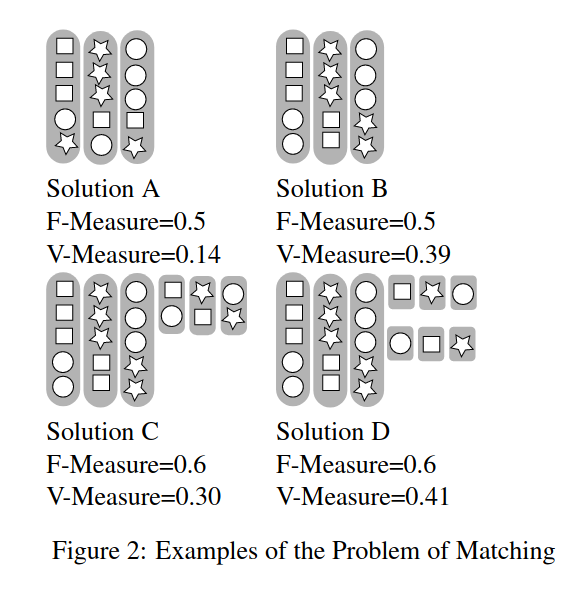


https://www.aclweb.org/anthology/D07-1043.pdf

In [ ]:
cluster = [0,0,0,1,2,0,1,2,2,2,0,1,1,1,2]
class_real = [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2]

homogeneity_completeness_v_measure(class_real, cluster)

(0.13502647928207306, 0.13502647928207306, 0.13502647928207306)

# 2. Rand Index

In [ ]:
import numpy as np
from scipy.misc import comb

# There is a comb function for Python which does 'n choose k'
# only you can't apply it to an array right away
# So here we vectorize it...
def myComb(a,b):
  return comb(a,b,exact=True)

vComb = np.vectorize(myComb)

def get_tp_fp_tn_fn(cooccurrence_matrix):
  tp_plus_fp = vComb(cooccurrence_matrix.sum(0, dtype=int),2).sum()
  tp_plus_fn = vComb(cooccurrence_matrix.sum(1, dtype=int),2).sum()
  tp = vComb(cooccurrence_matrix.astype(int), 2).sum()
  fp = tp_plus_fp - tp
  fn = tp_plus_fn - tp
  tn = comb(cooccurrence_matrix.sum(), 2) - tp - fp - fn

  return [tp, fp, tn, fn]

if __name__ == "__main__":
  # The co-occurrence matrix from example from
  # An Introduction into Information Retrieval (Manning, Raghavan & Schutze, 2009)
  # also available on:
  # http://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html
  #
  cooccurrence_matrix = np.array([[ 5,  1,  2], [ 1,  4,  0], [ 0,  1,  3]])

  # Get the stats
  tp, fp, tn, fn = get_tp_fp_tn_fn(cooccurrence_matrix)

  print "TP: %d, FP: %d, TN: %d, FN: %d" % (tp, fp, tn, fn)

  # Print the measures:
  print "Rand index: %f" % (float(tp + tn) / (tp + fp + fn + tn))

  precision = float(tp) / (tp + fp)
  recall = float(tp) / (tp + fn)

  print "Precision : %f" % precision
  print "Recall    : %f" % recall
  print "F1        : %f" % ((2.0 * precision * recall) / (precision + recall))

# Cambio de etiquetas a etiquetas binarias

In [ ]:
import numpy as np
clases = np.array(["bueno", "malo","bueno", "malo","bueno", "malo","bueno", "malo"])

In [ ]:

(clases == "bueno").astype("int32")

array([1, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

# Scaler inverse transform

In [ ]:
datos = np.random.normal(2, 10, [100])
datos

array([  9.71859734,  12.6535935 ,  -4.5007052 ,   3.75287391,
       -10.73902443,  -2.30790073,  12.65093156,  -1.48158038,
        -2.21079003,  18.35333624,  -2.04949822,  -8.00764286,
        22.38447099,   1.167777  ,   5.29843843,  -0.44199482,
        -5.81278085,   2.87814865,   9.84100026,  -8.93204938,
        -0.22497702,  -5.5907893 ,   0.5630885 ,  -1.33910153,
       -13.06083835,  10.068445  ,   0.34798142,  18.85796601,
        16.17342513,  12.56676118,   8.14955802,   5.18119623,
        -0.508657  ,   5.89503939,  11.59691866,  -6.15376733,
        14.17004967, -11.88904152,  18.64292269,   2.30412541,
        -1.94746523, -16.04736661,   1.65105458,  -9.69203822,
        -0.94469698,  -9.23944465,   8.43417773,  11.76799466,
       -10.76467722,   4.66825044,  -4.26520666,   4.37668138,
       -10.42977488,   3.50433105,  12.44151668,  -4.92671088,
        -5.72730944,  17.94833217,   5.59286554, -13.49050746,
         4.67275136,   0.3874674 ,   8.53914783,  17.43

In [ ]:
mean = datos.mean()
std = datos.std()
mean, std

(1.5368896990950833, 9.086379451717157)

In [ ]:
datos_transformados = (datos - datos.mean())/(datos.std())
datos_transformados

array([ 0.90043649,  1.22344701, -0.66446652,  0.24387978, -1.35102372,
       -0.42313778,  1.22315405, -0.33219723, -0.41245028,  1.85073127,
       -0.39469933, -1.05042197,  2.29437714, -0.04062264,  0.41397663,
       -0.21778581, -0.80886679,  0.14761203,  0.91390753, -1.15215737,
       -0.19390195, -0.78443554, -0.10717153, -0.31651674, -1.60655057,
        0.93893892, -0.13084511,  1.90626821,  1.61082151,  1.2138907 ,
        0.72775613,  0.40107356, -0.22512231,  0.47963545,  1.10715484,
       -0.846394  ,  1.39034035, -1.47758866,  1.88260166,  0.084438  ,
       -0.38347011, -1.93523244,  0.0125644 , -1.23579782, -0.27311061,
       -1.18598771,  0.7590799 ,  1.12598258, -1.35384693,  0.34462139,
       -0.63854876,  0.31253281, -1.31698931,  0.21652643,  1.20010693,
       -0.7113505 , -0.79946024,  1.80615861,  0.44637976, -1.65383773,
        0.34511674, -0.12649948,  0.77063237,  1.74944648,  0.35814834,
       -0.07687156, -0.38161007, -0.25298001,  1.90570192,  0.76

In [ ]:
mean_transformada = datos_transformados.mean()
std_transformada = datos_transformados.std()
mean_transformada, std_transformada

(-5.551115123125783e-18, 1.0)

In [ ]:
datos_originales = datos_transformados * std + mean

In [ ]:
mean_originales = datos_originales.mean()
std_originales = datos_originales.std()
mean_originales, std_originales

(1.5368896990950833, 9.086379451717157)

In [ ]:
print(datos.shape)
print(datos[:, np.newaxis].shape)

(100,)
(100, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
stds.fit(datos[:,np.newaxis])
datos_transformados = stds.transform(datos[:,np.newaxis])

In [ ]:
print(stds.mean_)
print(mean)

[0.08638801]
0.08638801364128701


In [ ]:
print(np.sqrt(stds.var_))
print(std)

[0.94264824]
0.9426482363573516


In [ ]:
stds.inverse_transform(datos_transformados)

array([[ 2.74674608],
       [ 0.63883647],
       [ 0.05203607],
       [-0.49474211],
       [-0.69070346],
       [-0.21568775],
       [ 0.86207749],
       [-0.43082911],
       [ 0.48767939],
       [ 0.15593787],
       [-0.80515469],
       [-1.88139836],
       [-0.61412557],
       [-0.21517794],
       [ 0.3796221 ],
       [ 0.86179629],
       [-2.28024228],
       [ 1.00813   ],
       [ 0.62852803],
       [ 2.32039165],
       [-0.31188178],
       [-0.48792099],
       [ 0.47914727],
       [-0.56718553],
       [ 0.92539978],
       [ 1.49757035],
       [-0.64950685],
       [ 2.02114926],
       [ 0.14821814],
       [-0.27755108],
       [-0.35295907],
       [-0.35228653],
       [ 0.23243799],
       [ 1.26628221],
       [ 1.04434417],
       [-1.16495588],
       [-0.25837861],
       [-0.03408609],
       [-0.74094352],
       [ 0.236429  ],
       [ 0.65355394],
       [-0.82289902],
       [ 0.05345436],
       [ 1.21286213],
       [ 0.33359017],
       [ 0

# Numpy Roll

In [ ]:
import numpy as np

In [ ]:
datos = np.random.normal(0,1, [10])
datos

array([-0.33450611, -1.10554275,  0.6082722 ,  0.20347976,  0.65953584,
        1.1171053 , -0.66821555,  1.69221247,  0.88217243,  1.6802425 ])

In [ ]:
ventana = np.roll(datos, shift=1)

In [ ]:
ventana

array([ 1.6802425 , -0.33450611, -1.10554275,  0.6082722 ,  0.20347976,
        0.65953584,  1.1171053 , -0.66821555,  1.69221247,  0.88217243])

In [ ]:
np.concatenate([ventana, np.array([3])])

array([ 1.6802425 , -0.33450611, -1.10554275,  0.6082722 ,  0.20347976,
        0.65953584,  1.1171053 , -0.66821555,  1.69221247,  0.88217243,
        3.        ])

In [ ]:
from nltk.cluster.kmeans import KMeansClusterer
NUM_CLUSTERS = <choose a value>
data = <sparse matrix that you would normally give to scikit>.toarray()

kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(data, assign_clusters=True)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [ ]:
round(2.5)

2

In [ ]:
round(0.45, 2)

0.45

In [ ]:
round(45)

45

In [ ]:
round(57.5)

58

In [ ]:
round(0.575,2)

0.57

In [ ]:
import numpy as np
np.round(57.5)

58.0

In [ ]:
np.round(0.575,2)

0.57

# Reproducibilidad

In [ ]:
import numpy as np

In [ ]:
np.random.randint(0, 10, 10)

array([0, 0, 2, 9, 7, 3, 2, 7, 7, 6])

In [ ]:
np.random.seed(10)
np.random.randint(0, 10, 10)

array([9, 4, 0, 1, 9, 0, 1, 8, 9, 0])

#

In [ ]:
import numpy as np
y = np.array([1, 0, 1, 0, 1, 0]) # clases

In [ ]:
y_pred = np.array([0, 0, 1, 0, 0 ,1 ]) # clusters

In [ ]:
y_pred == 1

array([False, False,  True, False, False,  True])

In [ ]:
y_pred[y_pred == 1 ]

array([1, 1])

In [ ]:
y[y_pred == 1]

array([1, 0])

# Extracción de y

In [ ]:
import pandas as pd
import numpy as np

# initialise data of lists.
data = {'Name':['Tom', 'nick', 'krish', 'jack'], 'Age':[20, 21, 19, 18], "pagador": [0,1,0,1]}

# Create DataFrame
df = pd.DataFrame(data)

# Print the output.
print(df)

    Name  Age  pagador
0    Tom   20        0
1   nick   21        1
2  krish   19        0
3   jack   18        1


In [ ]:
y = data["pagador"]
y

[0, 1, 0, 1]

In [ ]:
x = df.drop(columns  = "pagador")
x

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


# Ciclo For

In [ ]:
def funcion(n, p, verbose=False):
  if verbose: print(n)
  if verbose: print(p)

In [ ]:
funcion(2, [2,3,8], verbose=True)

2
[2, 3, 8]


In [ ]:
lista = [2, 5, 8, 9]

In [ ]:
for elemento in lista:
  print(elemento)

2
5
8
9


In [ ]:
8

In [ ]:
list(range(8))

[0, 1, 2, 3, 4, 5, 6, 7]

# OneHotEncoder

In [ ]:
import pandas as pd
import numpy as np

# initialise data of lists.
data = {'Name':['Tom', 'nick', 'krish', 'jack'], 'Age':[20, 21, 19, 18], "pagador": [0,1,0,1]}

# Create DataFrame
df = pd.DataFrame(data)

# Print the output.
print(df)

    Name  Age  pagador
0    Tom   20        0
1   nick   21        1
2  krish   19        0
3   jack   18        1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(df[["Name"]])
ohe.categories_

[array(['Tom', 'jack', 'krish', 'nick'], dtype=object)]

In [ ]:
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
ct = ColumnTransformer([("ohe", ohe, ["Name"])])
results = ct.fit_transform(df)
results.todense()

matrix([[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]])

In [ ]:
ct.get_feature_names_out()

array(['ohe__Name_Tom', 'ohe__Name_jack', 'ohe__Name_krish',
       'ohe__Name_nick'], dtype=object)

In [ ]:
ct.get_feature_names_out()[]

# Coeficiente de Silueta

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs


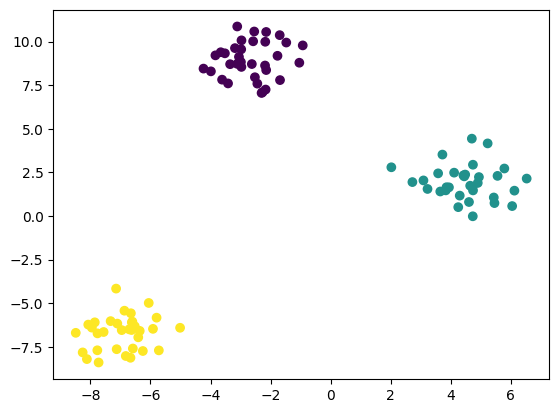

In [ ]:
# Creamos un conjunto de datos de prueba con 100 puntos y 3 clusters
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1],c=y)

In [ ]:
# Aplicamos el algoritmo K-means con k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


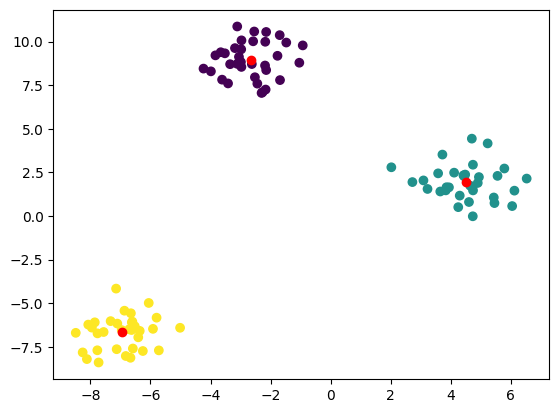

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1],c=y)
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:,0], centroides[:, 1], c="r")

In [ ]:
kmeans.labels_

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2], dtype=int32)

In [ ]:
# Obtenemos las etiquetas de cluster y el coeficiente de silueta
labels = kmeans.labels_
silhouette_coef = silhouette_score(X, labels)

print("El coeficiente de silueta es:", silhouette_coef)

El coeficiente de silueta es: 0.8469881221532085


# Transformer

In [1]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
ct = ColumnTransformer(
    [("norm1", Normalizer(norm='l1'), [0, 1]),
     ("norm2", Normalizer(norm='l1'), slice(2, 4))])
X = np.array([[0., 1., 2., 2.],
              [1., 1., 0., 1.]])
# Normalizer scales each row of X to unit norm. A separate scaling
# is applied for the two first and two last elements of each
# row independently.
ct.fit_transform(X)

array([[0. , 1. , 0.5, 0.5],
       [0.5, 0.5, 0. , 1. ]])

In [12]:
from numpy.random import randint
from sklearn.base import BaseEstimator, TransformerMixin


class MultiplierTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, multiplicador=5):
      """
      @multiplicador: el multiplicador para cada dato
      """
      self.multiplicador = multiplicador


    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        print(X)
        # Perform arbitary transformation
        X = X * self.multiplicador
        return X

In [13]:

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
ct = ColumnTransformer(
    [("transformacion_1", MultiplierTransformer(), [0, 1]),
     ("transformacion_2", MultiplierTransformer(10), slice(2, 4))])
X = np.array([[0., 1., 2., 2.],
              [1., 1., 0., 1.]])
# Normalizer scales each row of X to unit norm. A separate scaling
# is applied for the two first and two last elements of each
# row independently.
ct.fit_transform(X)

[[0. 1.]
 [1. 1.]]
[[2. 2.]
 [0. 1.]]


array([[ 0.,  5., 20., 20.],
       [ 5.,  5.,  0., 10.]])

# Agglomerative Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X)
AgglomerativeClustering()
clustering.labels_

array([1, 1, 1, 0, 0, 0])

In [16]:
clustering.children_

array([[0, 1],
       [3, 5],
       [2, 6],
       [4, 7],
       [8, 9]])

In [19]:
clustering.n_leaves_

6

In [20]:
clustering.n_connected_components_

1

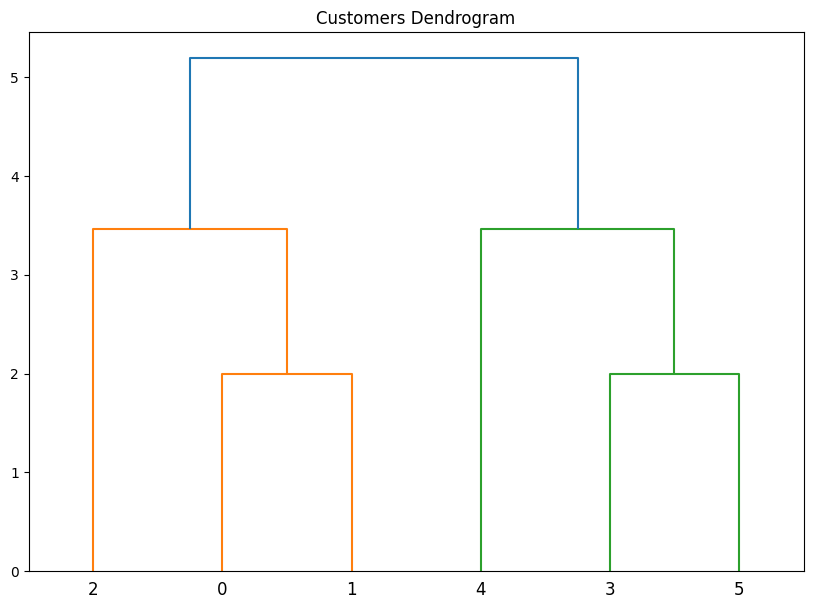

In [17]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(X,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [26]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [27]:
linkage_matrix = linkage(X, method='ward')

In [28]:
linkage_matrix

array([[0.        , 1.        , 2.        , 2.        ],
       [3.        , 5.        , 2.        , 2.        ],
       [2.        , 6.        , 3.46410162, 3.        ],
       [4.        , 7.        , 3.46410162, 3.        ],
       [8.        , 9.        , 5.19615242, 6.        ]])

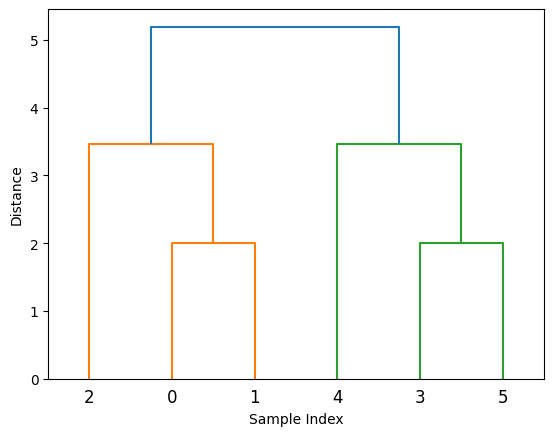

In [29]:
dendrogram(linkage_matrix, labels=range(len(X)), orientation='top')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [25]:
from collections import defaultdict

def count_children_by_depth(linkage_matrix):
    children_by_depth = defaultdict(int)
    for row in linkage_matrix:
        children_by_depth[row[2]] += 1
    return dict(children_by_depth)

children_by_depth = count_children_by_depth(linkage_matrix)
print(children_by_depth)

{2.0: 2, 3.4641016151377544: 2, 5.196152422706632: 1}
